In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from numpy.random import randn, rand, binomial
from cvxopt import matrix, solvers
from cvxopt.modeling import op, variable, sum, dot

In [38]:
d = 20
ntrial = 50
prob = np.zeros((d,d))
p = np.zeros((ntrial,d,d))
for n in range(1,d+1):  
# n = 1,2,...,d
    
    for k in range(1,n+1):
    # k = 1,2,...,n
    
        # repeat 50 times
        for i_n in range(ntrial):  
            x0 = np.zeros(d) # shape=(d,)
            ind_rand = np.random.randint(0,d, size=k) # index of sparse non-zero entries
            x0[ind_rand] = np.random.choice([1,-1], size=k, p=[0.5,0.5])
            
            A = np.random.randn(n,d)
            b = np.dot(A,x0)  # shape=(n,), n<d
            
            # linear programming
            x = variable(size=d)
            A, b = matrix(A), matrix(b)
            cond1 = (dot(A.T,x)==b)
            
            lp = op( sum(abs(x)), [cond1] )
            lp.solve()
#             print(lp.status)
            # lp.objective.value, x.value, cond1.multiplier.value
            
            x_value = np.array(x.value)
            p[i_n,n-1,k-1] = np.linalg.norm(x_value.reshape(-1) - x0)
        
        prob[n-1,k-1] = p.mean(axis=0)
        

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  4.4563e-02  4.4447e-02  2e+00  5e-01  3e-16  7e-02
 2:  3.4262e-01  3.4080e-01  5e-01  2e-01  3e-16  2e-02
 3:  3.2359e-01  3.2033e-01  2e-01  6e-02  2e-15  6e-03
 4:  3.4362e-01  3.4356e-01  4e-03  1e-03  2e-16  1e-04
 5:  3.4379e-01  3.4379e-01  4e-05  1e-05  9e-16  1e-06
 6:  3.4379e-01  3.4379e-01  4e-07  1e-07  3e-16  1e-08
 7:  3.4379e-01  3.4379e-01  4e-09  1e-09  8e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  6e+00  1e-16  1e+00
 1:  6.1372e-03  6.1311e-03  7e-01  2e-01  2e-16  3e-02
 2:  1.3021e-01  1.2938e-01  2e-01  5e-02  3e-16  7e-03
 3:  1.2469e-01  1.2357e-01  1e-01  3e-02  2e-15  4e-03
 4:  1.3056e-01  1.3053e-01  2e-03  6e-04  4e-16  6e-05
 5:  1.3063e-01  1.3063e-01  2e-05  6e-06  5e-16  6e-07
 6:  1.3063e-01  1.3063e-01  2e-07  6e-08  1e-15  6e-09
 7:  1.3063e-01  1.3063e-01 

 1:  7.1926e-03  7.1834e-03  7e-01  2e-01  2e-16  4e-02
 2:  1.3296e-01  1.3203e-01  2e-01  6e-02  2e-16  9e-03
 3:  1.2486e-01  1.2343e-01  1e-01  3e-02  7e-16  3e-03
 4:  1.3323e-01  1.3319e-01  2e-03  8e-04  6e-16  8e-05
 5:  1.3329e-01  1.3329e-01  2e-05  8e-06  4e-16  8e-07
 6:  1.3329e-01  1.3329e-01  2e-07  8e-08  4e-16  8e-09
 7:  1.3329e-01  1.3329e-01  2e-09  8e-10  5e-16  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  6.9523e-02  6.9181e-02  2e+00  7e-01  1e-16  9e-02
 2:  3.6066e-01  3.5843e-01  9e-01  3e-01  5e-16  4e-02
 3:  3.5535e-01  3.5336e-01  1e-01  3e-02  1e-15  3e-03
 4:  3.6129e-01  3.6127e-01  1e-03  4e-04  2e-16  3e-05
 5:  3.6135e-01  3.6135e-01  1e-05  4e-06  3e-16  3e-07
 6:  3.6135e-01  3.6135e-01  1e-07  4e-08  2e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1: 

 7:  1.5249e-01  1.5249e-01  4e-09  1e-09  8e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  1.7975e-01  1.7925e-01  2e+00  8e-01  2e-16  1e-01
 2:  8.0659e-01  8.0421e-01  9e-01  3e-01  5e-16  4e-02
 3:  7.8318e-01  7.7921e-01  5e-01  2e-01  9e-16  2e-02
 4:  8.0950e-01  8.0939e-01  1e-02  3e-03  4e-16  3e-04
 5:  8.1051e-01  8.1051e-01  1e-04  3e-05  7e-16  3e-06
 6:  8.1052e-01  8.1052e-01  1e-06  3e-07  1e-15  3e-08
 7:  8.1052e-01  8.1052e-01  1e-08  3e-09  6e-16  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  1.0902e-01  1.0870e-01  2e+00  7e-01  2e-16  9e-02
 2:  5.7728e-01  5.7504e-01  8e-01  2e-01  3e-16  3e-02
 3:  5.6180e-01  5.5841e-01  4e-01  1e-01  2e-15  1e-02
 4:  5.7938e-01  5.7932e-01  6e-03  2e-03  5e-16  2e-04
 5:  5.7975e-01  5.7975e-01  6e-05  2e-05  7e-16  2e-06
 6: 

ValueError: setting an array element with a sequence.

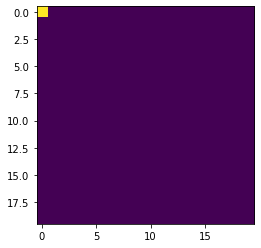

In [39]:

plt.imshow(p[1]);
# ?